# **Introduction to Data Visualization**

Visualisasi Data adalah penyajian data dalam format gambar atau grafik. Visualisasi Data juga bisa didefinisikan sebagai disiplin untuk memahami data dengan menyajikannya secara visual sehingga pola atau tren, komposisi, perbandingan dan hubungan apa pun dapat diekspos

Kita dapat memanfaatkan visualisasi data untuk mengeksplorasi data untuk menemukan insight dari data kita. Kita juga dapat berbagi temuan kita dengan orang lain dengan menggunakan visualisasi data. Otak manusia lebih mudah memproses informasi apapun menggunakan visualisasi daripada spreadsheet atau laporan.
___

In [3]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Why is data visualization necessary?**

Sejauh ini, kita banyak fokus pada merangkum data menggunakan statistik. Namun, ringkasan statistik tidak cukup untuk memahami distribusi; ada banyak kemungkinan distribusi untuk kumpulan statistik ringkasan tertentu. Visualisasi data diperlukan untuk benar-benar memahami distribusinya:

![DataSaurus Dozen.gif](<attachment:DataSaurus Dozen.gif>)

Sulit untuk menemukan pola dan memperoleh insight dari data mentah. Statistik dapat meringkas data, tetapi mungkin menyembunyikan pola penyebaran data.

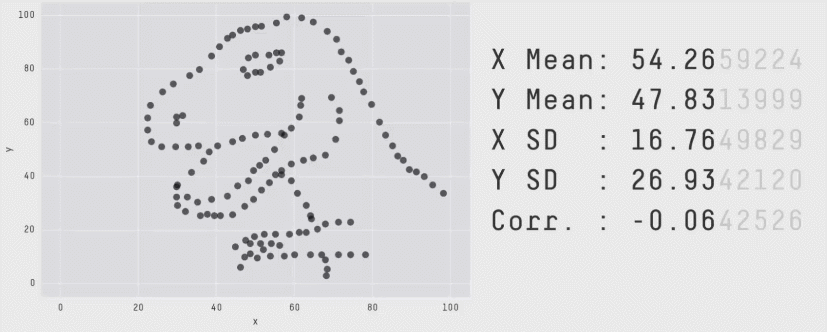

## **2. Why start with Matplotlib?**

Ada banyak pustaka untuk membuat visualisasi data dengan Python (bahkan lebih banyak lagi jika Anda menyertakan pustaka yang dibangun di atasnya). Di bagian ini, kita akan mempelajari peran Matplotlib dalam ekosistem visualisasi data Python sebelum mendalaminya.

<figure>
  <blockquote cite="https://matplotlib.org/stable/index.html" style="border-left: none; box-shadow: none;">
    Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. &#91;It&#93; makes easy things easy and hard things possible.
  </blockquote>
  <figcaption style="text-align: right">&ndash; <a href="https://matplotlib.org/stable/index.html" target="_blank" rel="noopener noreferrer">Matplotlib documentation</a></figcaption>
</figure>

Kita akan mulai dengan menggunakan dataset `stackoverflow_monthly.csv`, yang berisi judul dan tag untuk semua pertanyaan Stack Overflow yang diberi tag beberapa pustaka Python terpilih sejak dimulainya Stack Overflow (September 2008) hingga 12 September 2021. Datanya berasal dari [Stack Overflow API](https://api.stackexchange.com/docs/search).

In [4]:
#mengubah creation_date menjadi index dengan index_col
stackoverflow_monthly = pd.read_csv('../../csv/stackoverflow_monthly.csv',parse_dates=True, index_col='creation_date')
stackoverflow_monthly.head()

pandas  matplotlib  numpy  seaborn  geopandas  geoviews  \
creation_date                                                            
2008-09-30          0           2      3        0          0         0   
2008-10-31          0           0      2        0          0         0   
2008-11-30          0           0      3        0          0         0   
2008-12-31          0           2      4        0          0         0   
2009-01-31          0           1      7        0          0         0   

               altair  yellowbrick  vega  holoviews  hvplot  bokeh  
creation_date                                                       
2008-09-30          0            0     0          0       0      0  
2008-10-31          0            0     0          0       0      0  
2008-11-30          0            0     0          0       0      0  
2008-12-31          0            0     0          0       0      0  
2009-01-31          0            0     0          0       0      0

In [5]:
stackoverflow_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2008-09-30 to 2021-08-31
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   pandas       156 non-null    int64
 1   matplotlib   156 non-null    int64
 2   numpy        156 non-null    int64
 3   seaborn      156 non-null    int64
 4   geopandas    156 non-null    int64
 5   geoviews     156 non-null    int64
 6   altair       156 non-null    int64
 7   yellowbrick  156 non-null    int64
 8   vega         156 non-null    int64
 9   holoviews    156 non-null    int64
 10  hvplot       156 non-null    int64
 11  bokeh        156 non-null    int64
dtypes: int64(12)
memory usage: 15.8 KB


Selanjutnya, kita memplot pertanyaan Matplotlib bulanan dari waktu ke waktu dengan memanggil metode `plot()`:

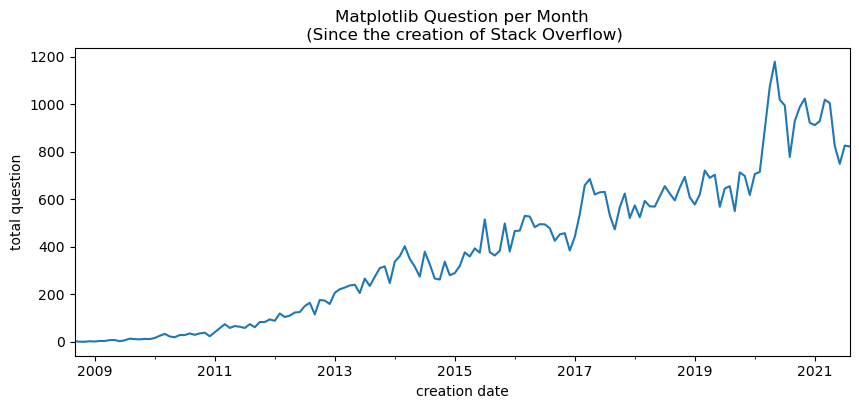

In [6]:
#.plot(kind='')
stackoverflow_monthly['matplotlib'].plot( #plot default dari pandas
    figsize=(10,4), #ukuran canvas
    kind='line', #jenis chart
    xlabel='creation date',
    ylabel='total question',
    title='Matplotlib Question per Month\n (Since the creation of Stack Overflow)'
    )
plt.show() #menghilangkan deskripsi yang mengganggu

Perhatikan bahwa metode tersebut mengembalikan objek `Axes` Matplotlib karena panda menggunakan Matplotlib sebagai backend pembuatan plot. Artinya, panda melakukan banyak pekerjaan bagi kita; beberapa contohnya antara lain sebagai berikut:

- Membuat gambar: [kode sumber](https://github.com/pandas-dev/pandas/blob/f5c224215ad0b3728173c67330ffcf13b35bdb2e/pandas/plotting/_matplotlib/core.py#L373-L392)
- Memanggil metode `Axes.plot()`: [kode sumber](https://github.com/pandas-dev/pandas/blob/f5c224215ad0b3728173c67330ffcf13b35bdb2e/pandas/plotting/_matplotlib/core.py#L759-L760)
- Menambahkan judul/label: [kode sumber](https://github.com/pandas-dev/pandas/blob/f5c224215ad0b3728173c67330ffcf13b35bdb2e/pandas/plotting/_matplotlib/core.py#L576-L591)

Meskipun panda dapat melakukan banyak pekerjaan untuk kita, ada manfaatnya memahami cara bekerja dengan Matplotlib secara langsung.

#### `Fleksibilitas`

Kita dapat menggunakan struktur data lain (seperti array NumPy) tanpa perlu melakukan konversi ke struktur data pandas hanya untuk membuat plot.

#### `Kustomisasi`

Meskipun kita menggunakan panda untuk membuat plot awal, kita dapat menggunakan perintah Matplotlib pada objek `Axes`  untuk mengubah bagian visualisasi lainnya. Hal ini juga berlaku untuk perpustakaan mana pun yang menggunakan Matplotlib sebagai backend plotnya; contohnya antara lain sebagai berikut:
- [Cartopy](https://scitools.org.uk/cartopy/docs/latest/): pemrosesan data geospasial untuk menghasilkan visualisasi peta
- [ggplot](https://github.com/yhat/ggplot): Versi Python dari paket `ggplot2` R yang populer
- [HoloViews](http://holoviews.org/): visualisasi interaktif dengan kode minimal
- [Seaborn](https://seaborn.pydata.org/): antarmuka tingkat tinggi untuk membuat visualisasi statistik dengan Matplotlib
- [Yellowbrick](https://www.scikit-yb.org/): ekstensi Scikit-Learn untuk membuat visualisasi guna menganalisis kinerja pembelajaran mesin

*Catatan: Matplotlib menyimpan daftar pustaka tersebut [di sini](https://matplotlib.org/stable/thirdpartypackages/index.html).*

#### `Ekstensibilitas`

Anda juga dapat membangun pustaka pribadi/kerja berdasarkan Matplotlib. Ini mungkin berarti menentukan tema atau fungsi plot khusus untuk membuat visualisasi yang umum digunakan.

Selain itu, jika Anda ingin berkontribusi pada pustaka visualisasi data open source (seperti yang disebutkan di atas), pengetahuan tentang Matplotlib akan berguna. Contohnya adalah penambahan metode `refline()` di perpustakaan Seaborn. Metode ini memungkinkan untuk menggambar garis referensi horizontal/vertikal pada semua subplot sekaligus. Metode Matplotlib `axhline()` dan `axvline()` adalah dasar dari [kontribusi ini](https://github.com/mwaskom/seaborn/commit/a626c0ae29b8c777b8e1342948e1611b984bf27b):

<div style="text-align: tengah;">
    <img width="60%" src="https://pbs.twimg.com/media/FBSw8BPX0AAa3wn?format=jpg&name=medium" alt="Seaborn refline() contoh" style="min-width: 300px">
    <div><small><em><a href="https://twitter.com/chris1610/status/1446976863365124098">Sumber</a></em></small></div>
</div>

## **3. Matplotlib Basic**

Objek `Figure` adalah wadah untuk semua komponen visualisasi kita. Ini berisi satu atau lebih objek `Axes`, yang dapat dianggap sebagai (sub)plot, serta [*Artists*](https://matplotlib.org/stable/tutorials/intermediate/artists.html) lainnya , yang menggambar di kanvas plot (sumbu x, sumbu y, legenda, garis, dll.). Gambar berikut dari dokumentasi Matplotlib mengilustrasikan berbagai komponen dari sebuah `Figure`:

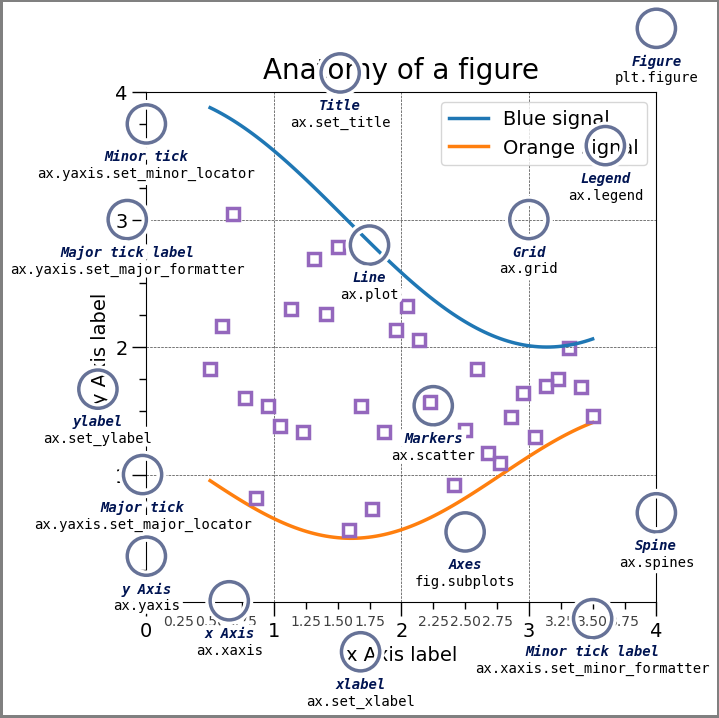

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()


Matplotlib menyediakan 2 cara utama untuk [plotting interfaces](https://matplotlib.org/stable/users/explain/api_interfaces.html):
1. **Functional (implicit)**: memanggil <u>fungsi</u> yang disediakan `pyplot` module
2. **Object-oriented (explicit)**: memanggil <u>metode</u> pada objek `Figure` dan `Axes`.

Meskipun pendekatan berorientasi objek didorong untuk digunakan oleh Matplotlib dan sangat direkomendasikan untuk penggunaan non-interaktif (yaitu, di luar Notebook Jupyter), pendekatan mana pun valid &ndash; Namun, Anda harus menghindari menggabungkan keduanya. Perhatikan bahwa kasus penggunaan yang berbeda memiliki pendekatan yang berbeda, jadi kita akan mengeksplorasi contoh keduanya di bagian ini.

#### `Functional (implicit) approach`

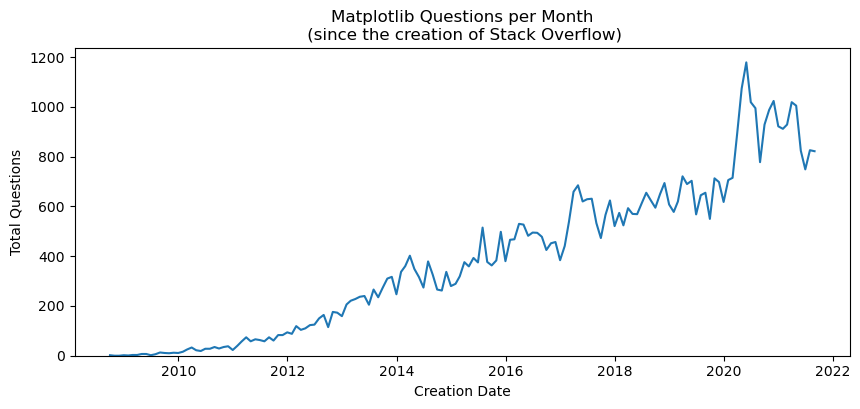

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(stackoverflow_monthly.index, 
        stackoverflow_monthly['matplotlib'])
plt.xlabel('Creation Date')
plt.ylabel('Total Questions')
plt.title('Matplotlib Questions per Month\n (since the creation of Stack Overflow)')
plt.ylim(0,None) #plt.ylim(400,700) 

plt.show()

#### `Object-oriented (explicit) approach`

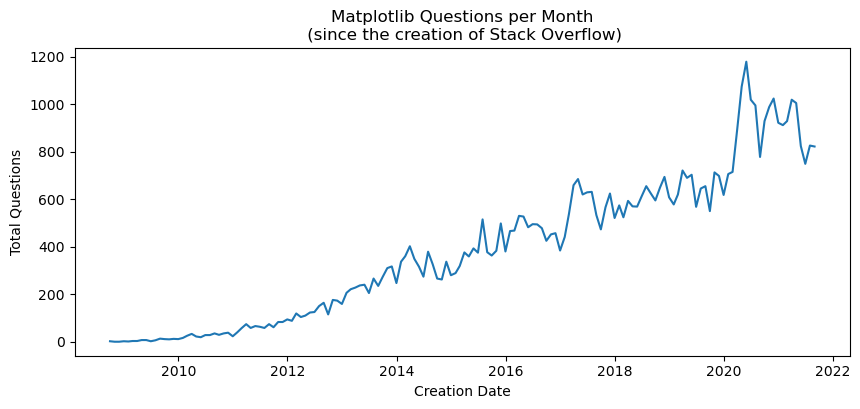

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(
    stackoverflow_monthly.index, #sumbu x
    stackoverflow_monthly['matplotlib'] #sumbu y
)
ax.set_xlabel('Creation Date')
ax.set_ylabel('Total Questions')
ax.set_title('Matplotlib Questions per Month\n (since the creation of Stack Overflow)')
plt.show()

*Tips: Perhatikan bahwa setiap perintah plotting mengembalikan sesuatu. Ini adalah objek Matplotlib yang juga dapat kita gunakan untuk menyesuaikan visualisasi lebih lanjut.*

Seperti disebutkan sebelumnya, kita dapat menggunakan kode Matplotlib untuk mengubah plot yang dibuat panda untuk kita. Di sini, kita akan menggunakan pendekatan berorientasi objek untuk menghilangkan spine atas dan kanan dan memulai sumbu y dari 0, sambil mempertahankan pengaturan saat ini di akhir:

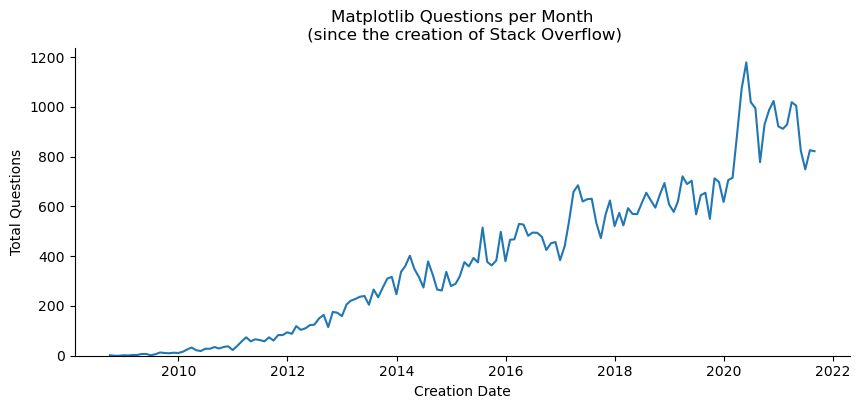

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(
    stackoverflow_monthly.index, #sumbu x
    stackoverflow_monthly['matplotlib'] #sumbu y
)
ax.set_xlabel('Creation Date')
ax.set_ylabel('Total Questions')
ax.set_title('Matplotlib Questions per Month\n (since the creation of Stack Overflow)')
ax.set_ylim(0,None)
ax.spines[['top','right']].set_visible(False) #menghilangkan garis/spine atas
#ax.spines['right'].set_visible(False) #menghilangkan garis/spine kanan
plt.show()

*Tips: Anda dapat menggunakan pendekatan fungsional untuk mengubah batas sumbu y dengan mengganti `ax.set_ylim(0, None)` dengan `plt.ylim(0, None)`.*

Sekarang setelah kita menguasai dasar-dasarnya, mari kita lihat cara membuat tipe plot lain dan menambahkan komponen tambahan ke dalamnya, seperti legenda, garis referensi, dan anotasi. Perhatikan bahwa anatomi diagram gambar yang kita lihat sebelumnya akan membantu peralihan dari ide ke implementasi karena membantu mengidentifikasi kata kunci yang tepat untuk dicari. Mungkin juga bermanfaat untuk menandai lembar contekan Matplotlib [ini](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

## **4. Plotting with Matplotlib**

Sekarang setelah kita memahami sedikit tentang cara kerja Matplotlib, kita akan membahas beberapa contoh yang lebih terlibat, yang mencakup legenda, baris referensi, dan/atau anotasi, serta menyusunnya langkah demi langkah. Perhatikan bahwa meskipun menggunakan perpustakaan seperti pandas untuk melakukan pembuatan plot awal dapat mempermudah segalanya, kami akan fokus menggunakan Matplotlib secara eksklusif agar lebih memahaminya.

Setiap contoh di bagian ini akan menunjukkan cara membuat plot tertentu dengan Matplotlib secara langsung dan cara menyesuaikannya dengan beberapa teknik pembuatan plot tingkat lanjut yang tersedia. Secara khusus, kita akan mempelajari cara membuat dan menyesuaikan jenis plot berikut:

- histograms
- box plots
- line plots
- area plots
- scatter plots
- bar plots
- stacked bar plots

## **5. Histogram**

Histogram digunakan untuk **menampilkan distribusi data** (dapat berupa frekuensi atau density). Secara umum histogram dapat memperlihatkan frekuensi (jumlah data yang muncul) pada rentang nilai tertentu. Histogram merupakan cara visualisasi **Univariate (1 variabel) Numerical**.

Dataset baru yang akan kita kerjakan berisi pintu masuk dan keluar kereta bawah tanah NYC per wilayah per hari untuk 2017-2021. Data tersebut diambil sampel ulangnya dari [ini](https://www.kaggle.com/eddeng/nyc-subway-traffic-data-20172021?select=NYC_subway_traffic_2017-2021.csv). Kumpulan data kita terlihat seperti ini:


In [12]:
subway = pd.read_csv('../../csv/NYC_subway_daily.csv',parse_dates=['Datetime'],index_col=['Borough','Datetime'])
subway.head()

Entries     Exits
Borough Datetime                       
Bk      2017-02-04   617650.0  417449.0
        2017-02-05   542667.0  405607.0
        2017-02-06  1184916.0  761166.0
        2017-02-07  1192638.0  763653.0
        2017-02-08  1243658.0  788356.0

In [47]:
#mengubah beberapa level dari indeks hierarkis (MultiIndex) menjadi label kolom daripada label baris
subway_daily = subway.unstack(0)
subway_daily


Entries                                    Exits            \
Borough            Bk        Bx          M         Q        Bk        Bx   
Datetime                                                                   
2017-02-04   617650.0  247539.0  1390496.0  408736.0  417449.0  148237.0   
2017-02-05   542667.0  199078.0  1232537.0  339716.0  405607.0  139856.0   
2017-02-06  1184916.0  472846.0  2774016.0  787206.0  761166.0  267991.0   
2017-02-07  1192638.0  470573.0  2892462.0  790557.0  763653.0  270007.0   
2017-02-08  1243658.0  497412.0  2998897.0  825679.0  788356.0  275695.0   
...               ...       ...        ...       ...       ...       ...   
2021-08-09   416964.0  176407.0   836603.0  316604.0  438273.0  168791.0   
2021-08-10   439452.0  178417.0   889912.0  330299.0  462818.0  174888.0   
2021-08-11   442855.0  183132.0   899173.0  331304.0  464905.0  175388.0   
2021-08-12   438576.0  178191.0   884371.0  327306.0  463303.0  172487.0   
2021-08-13   346768.0  151257.0   639806.0  268861.0  332156.0  121962.0   

                                 
Borough             M         Q  
Datetime                         
2017-02-04  1225689.0  279699.0  
2017-02-05  1033610.0  268626.0  
2017-02-06  2240027.0  537780.0  
2017-02-07  2325024.0  544828.0  
2017-02-08  2389534.0  559639.0  
...               ...       ...  
2021-08-09  1032724.0  322343.0  
2021-08-10  1109777.0  339166.0  
2021-08-11  1124608.0  337363.0  
2021-08-12  1116445.0  332967.0  
2021-08-13   875206.0  229383.0  

[1652 rows x 8 columns]

In [48]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6608 entries, ('Bk', Timestamp('2017-02-04 00:00:00')) to ('Q', Timestamp('2021-08-13 00:00:00'))
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Entries  6608 non-null   float64
 1   Exits    6608 non-null   float64
dtypes: float64(2)
memory usage: 200.4+ KB


Kita akan membuat histogram entri kereta bawah tanah harian di Manhattan dengan data ini menggunakan langkah-langkah berikut:
1. Create the histogram.
2. Label and format the plot.
3. Explore the use of subplots.
4. Apply a style sheet.

#### `1. Create the histogram.`
Untuk membuat histogram, kita menggunakan metode `hist()`:

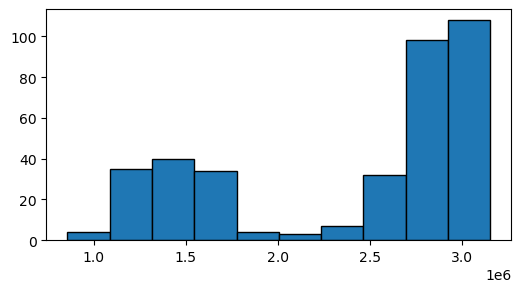

In [55]:
fig,ax = plt.subplots(figsize=(6,3))
ax.hist(subway_daily.loc['2018','Entries']['M'],
        ec='black')
plt.show()


#### `2. Label and format the plot.`
Selanjutnya, kita membersihkan plot dengan memberi label pada sumbu dan memformat tick labels. Modul `matplotlib.ticker` mengandung kelas untuk lokasi tick and memformat untuk tipe data selain tanggal.

In [ ]:
from matplotlib import ticker

Selanjutnya kita akan membuat fungsi utilitas untuk menghilangkan spine atas dan kanan plot kita dengan lebih mudah kedepannya. Mengembalikan objek `Axes` dianggap sebagai praktik yang baik:

In [59]:
def despine(ax):
    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)
    return ax

NameError: name 'ticker' is not defined

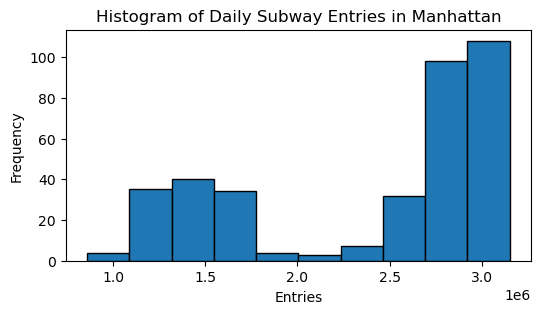

In [61]:
fig,ax = plt.subplots(figsize=(6,3))

ax.hist(subway_daily.loc['2018','Entries']['M'],
        ec='black')
ax.set(
    xlabel='Entries',
    ylabel='Frequency',
    title='Histogram of Daily Subway Entries in Manhattan'
)

ax.xaxis.set_major_formatter(ticker.EngFormatter())
despine(ax)
plt.show()


#### `3. Explore the use of subplots.`
Histogram entri kereta bawah tanah harian di Manhattan menunjukkan distribusi yang jelas bersifat bimodal. Mari kita gunakan subplot untuk memisahkan distribusi hari kerja dan akhir pekan yang digabungkan untuk menghasilkan bentuk yang kita lihat.

Pertama, kita perlu membuat Boolean Mask agar dapat memfilter data berdasarkan hari kerja versus akhir pekan:

In [63]:
weekday_mask = subway_daily.index.weekday < 5
weekday_mask

array([False, False,  True, ...,  True,  True,  True])

In [65]:
subway_daily[weekday_mask]

Entries                                    Exits            \
Borough            Bk        Bx          M         Q        Bk        Bx   
Datetime                                                                   
2017-02-06  1184916.0  472846.0  2774016.0  787206.0  761166.0  267991.0   
2017-02-07  1192638.0  470573.0  2892462.0  790557.0  763653.0  270007.0   
2017-02-08  1243658.0  497412.0  2998897.0  825679.0  788356.0  275695.0   
2017-02-09   634546.0  242587.0  1656711.0  422201.0  458342.0  163598.0   
2017-02-10  1183652.0  467586.0  2889220.0  784178.0  742926.0  258144.0   
...               ...       ...        ...       ...       ...       ...   
2021-08-09   416964.0  176407.0   836603.0  316604.0  438273.0  168791.0   
2021-08-10   439452.0  178417.0   889912.0  330299.0  462818.0  174888.0   
2021-08-11   442855.0  183132.0   899173.0  331304.0  464905.0  175388.0   
2021-08-12   438576.0  178191.0   884371.0  327306.0  463303.0  172487.0   
2021-08-13   346768.0  151257.0   639806.0  268861.0  332156.0  121962.0   

                                 
Borough             M         Q  
Datetime                         
2017-02-06  2240027.0  537780.0  
2017-02-07  2325024.0  544828.0  
2017-02-08  2389534.0  559639.0  
2017-02-09  1369515.0  327995.0  
2017-02-10  2356212.0  521273.0  
...               ...       ...  
2021-08-09  1032724.0  322343.0  
2021-08-10  1109777.0  339166.0  
2021-08-11  1124608.0  337363.0  
2021-08-12  1116445.0  332967.0  
2021-08-13   875206.0  229383.0  

[1180 rows x 8 columns]

In [74]:
subway_daily[~weekday_mask].loc['2018','Entries']['M']

Datetime
2018-01-06    1218923.0
2018-01-07    1028343.0
2018-01-13    1472258.0
2018-01-14    1170817.0
2018-01-20    1650558.0
                ...    
2018-12-16    1362046.0
2018-12-22    1651585.0
2018-12-23    1415788.0
2018-12-29    1740905.0
2018-12-30    1472831.0
Name: M, Length: 104, dtype: float64

Selanjutnya, kita perlu memperbarui panggilan kita ke `plt.subplots()` untuk menentukan satu baris dua kolom sebagai tata letak kita, dengan semua subplot berbagi rentang sumbu x yang sama (`sharex=True`). Karena jumlah hari akhir pekan lebih sedikit dibandingkan hari kerja dalam setahun, kita tidak akan berbagi sumbu y (`sharey=False`). Seperti sebelumnya, kita memanggil metode `hist()` untuk menambahkan histogram ke setiap subplot:

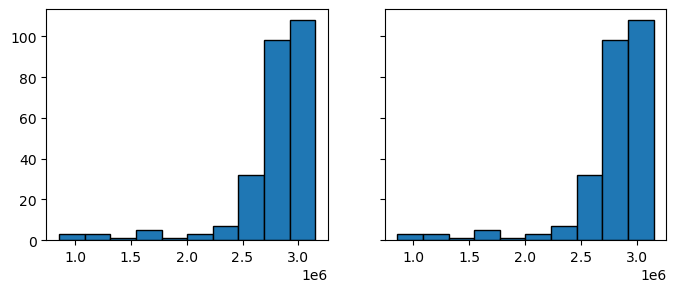

In [78]:
fig,axes = plt.subplots(1,2, figsize=(8,3), sharey=True)
axes[0].hist(       #1 baris 2 kolom
    subway_daily[weekday_mask].loc['2018','Entries']['M'],
    ec='black'
)
axes[1].hist(
    subway_daily[weekday_mask].loc['2018','Entries']['M'],
    ec='black'
)
plt.show()

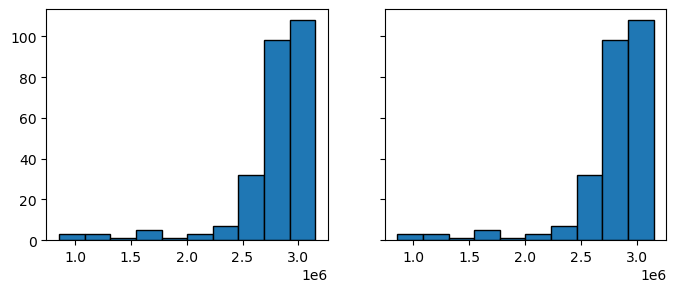

In [79]:
fig, axes = plt.subplots(1,2, figsize=(8,3), sharey=True)

for ax, mask in zip(axes, [weekday_mask, ~weekday_mask]):
    ax.hist(
        subway_daily[weekday_mask].loc['2018','Entries']['M'],
        ec='black'
    )
plt.show()

Sekarang, mari kita beri label dan format subplotnya. Kita akan menggunakan label sumbu x untuk membedakan antara distribusi hari kerja dan akhir pekan, dan kita hanya akan memberikan label untuk sumbu y pada plot paling kiri untuk mengurangi kekacauan. Ini mengharuskan kita menyertakan label di loop `for` kita. Di sini, kita juga memperbarui format label centang sumbu x untuk menggunakan notasi engineering:

NameError: name 'ticker' is not defined

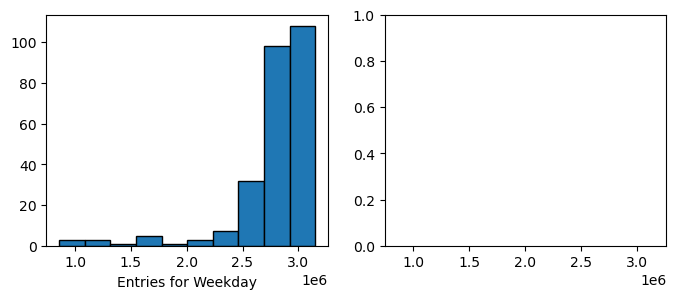

In [80]:
fig, axes = plt.subplots(1,2, figsize=(8,3), sharex=True, sharey=False)

for ax, mask, label in zip(axes, [weekday_mask, ~weekday_mask], ['Weekday','Weekend']):
    ax.hist(
        subway_daily[weekday_mask].loc['2018','Entries']['M'],
        ec='black'
    )
    ax.set_xlabel(f'Entries for {label}')
    ax.xaxis.set_major_formatter(ticker.EngFormatter)

axes[0].set_xlabel()
plt.show()

Karena kita memiliki beberapa subplot, kita perlu memanggil metode `suptitle()` pada objek `Figure` untuk memberikan judul untuk keseluruhan visualisasi. Hal ini menunjukkan adanya pergeseran yang jelas dalam penggunaan kereta bawah tanah antara hari kerja dan akhir pekan, serta dampak dari kepadatan di jembatan dan terowongan:

Sebelum melanjutkan, mari kita kemas kode ini dalam sebuah fungsi. Perhatikan bahwa kita menghapus panggilan ke `despine()` karena style sheet yang akan kita gunakan selanjutnya sudah menyembunyikan spine:

#### `4. Apply a style sheet`.
Matplotlib hadir dengan berbagai [style sheet](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) yang memudahkan penyesuaian sejumlah pengaturan sekaligus. Kita dapat mengaktifkan style sheet untuk satu plot menggunakan `plt.style.context()` [context manager](https://realpython.com/python-with-statement/). Di sini, kita menerapkan style sheet `seaborn-darkgrid`:

In [21]:
style_list = ['default',
 'classic',
 'Solarize_Light2',
 'bmh',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Setelah menerapkan style sheet ini, agak sulit untuk mengetahui di mana letak tanda centang pada sumbu x untuk wilayah yang diisi dengan batang.

## **6. Boxplot**

Sebagai alternatif visualisasi sebelumnya, kita akan membuat boxplot. Sama seperti histogram, boxplot merupakan cara visualisasi **Univariate (1 variabel) Numerical**. Boxplot dapat digunakan untuk:

- Menampilkan distribusi data
- Mendeteksi outlier
- Melihat IQR
- Univariate (1 Variable) Numerikal

Kode awal kita terlihat sangat mirip &ndash; kita cukup memanggil metode `boxplot()` alih-alih metode `hist()`:


Namun, kali ini setiap subplot memiliki satu tanda centang dengan label **1**. Daripada menyetel label sumbu x, kita perlu menggunakan metode `set_xticklabels()`:

Perubahan terakhir yang akan kita bahas di bagian ini adalah metode `tight_layout()`, yang akan menyesuaikan tata letak visualisasi untuk memanfaatkan ruang dengan lebih baik (informasi lebih lanjut [disini](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html?highlight=tight%20layout%20guide)). Perhatikan bahwa di sini jarak antar subplot dikurangi dengan menyesuaikan panjang sumbu x setiap subplot. Metode ini juga berguna bila label tertutup sebagian:

Alternatif untuk tight layout adalah **constrained layout**, yang menggunakan constraint solver untuk menentukan penempatan elemen plot (informasi lebih lanjut [disini](https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)). Berbeda dengan tight layout, constrained layout harus diaktifkan sebelum kita membuat plot, jadi kita perlu memodifikasi panggilan `plt.subplots()`:

*Tips: Simpan visualisasi apa pun yang telah kita buat dengan memanggil fungsi `plt.savefig()` atau metode `savefig()` pada objek `Figure` sebagai baris terakhir dalam sel yang menghasilkan plot.*

## **7. Lineplot**

Data Stack Overflow yang telah kita kerjakan sebelumnya adalah data time series, sehingga untuk visualisasi selanjutnya kita akan menggunakan lineplot untuk mempelajari evolusi data dari waktu ke waktu. 

Lineplot merepresentasikan **trend/progress dalam rentang waktu tertentu**. Lineplot menggunakan **data time series** (berkaitan dengan waktu). Lineplot merupakan contoh visualisasi Bivariate (2 Variable) untuk melihat hubungan variabel **Time Series versus Numerical**.

Kita akan menggunakan data Stack Overflow. Namun, daripada menggunakan agregat bulanan seperti sebelumnya, kita akan menggunakan data harian, jadi kita akan membaca data `stackoverflow_daily.csv`.

Kita akan memvisualisasikan bagaimana jumlah rata-rata pertanyaan Matplotlib selama 30 hari terakhir yang bergerak seiring waktu (moving average 30), bersama dengan standar deviasinya. Untuk melakukannya, pertama-tama kita perlu menghitung titik data berikut menggunakan panda:

Sekarang, kita dapat melanjutkan untuk membangun visualisasi ini. Kita akan melakukan langkah-langkah berikut pada beberapa tahap berikutnya:
1. Create the line plot.
2. Add a shaded region for $\pm$ 2 standard deviations from the mean.
3. Set the axis labels, y-axis limits, plot title, and despine the plot.

#### `1. Create the line plot.`

Secara default, metode `plot()` akan mengembalikan sebuah line plot:

#### `2. Add a shaded region for +/- 2 standard deviations from the mean.`

Selanjutnya, kita menggunakan metode `fill_between()` untuk mengarsir wilayah $\pm$ 2 kali standar deviasi dari rerata. Perhatikan bahwa kita juga menetapkan `alpha=0.25` untuk membuat wilayah tersebut menjadi 25% buram &ndash; cukup transparan untuk dengan mudah melihat garis rata-rata 30 hari yang bergulir:

#### `3. Set the axis labels, y-axis limits, plot title, and despine the plot.`

Sekarang untuk sentuhan terakhir. Jika pada contoh sebelumnya kita menggunakan `ax.set_xlabel()`, `ax.set_ylabel()`, dll., di sini kita menggunakan `ax.set()`, yang memungkinkan kita menyetel beberapa atribut plot dalam satu panggilan metode.

## **8. Area plot**

Kita baru saja menggunakan time series terkait pertanyaan seputar Matplotlib, tetapi menarik juga untuk melihat tren di beberapa pustaka lainnya. Karena pustaka dalam kumpulan data ini bervariasi dalam hal usia, popularitas, dan jumlah pertanyaan Stack Overflow, opsi yang baik untuk melihat banyak pertanyaan sekaligus adalah plot area. Hal ini akan memberi kita gambaran tentang tren keseluruhan jenis pustaka ini dan pustaka itu sendiri. Mari kita mulai dengan mengelompokkan data pertanyaan Stack Overflow harian kita ke empat pustaka teratas berdasarkan jumlah pertanyaan:

Sekarang, kita bisa membuat plot kita. Sekali lagi, kita akan membaginya menjadi beberapa langkah:
1. Create the area plot.
2. Label and format the axes, provide a title, and despine the plot.
3. Add annotations.

#### `1. Create the area plot.`

Pertama, kita menggunakan `stackplot()` untuk membuat plot area sebagai titik awal. Namun sebelumnya kita akan mengubah tanggal menjadi format tanggal Matplotlib sedari awal. Kita bisa menggunakan fungsi `date2num()` pada modul `matplotlib.dates` untuk konversi tanggal menjadi format tanggal Matplotlib:

#### `2. Label and format the axes, provide a title, and despine the plot.`

Selanjutnya, kita akan menangani label dan pemformatan sebelum mengerjakan anotasi. Ini seharusnya terlihat familiar dari contoh sebelumnya:

Ini akan menjadi dasar dari beberapa visualisasi yang kita lakukan di bagian ini, jadi mari kita buat fungsi untuk apa yang kita miliki sejauh ini:

#### `3. Add annotations.`

Daripada menggunakan legenda untuk plot ini, kita akan menggunakan anotasi untuk memberi label pada setiap area dan memberikan nilai median pada tahun 2021. Untuk membuat anotasi, kita menggunakan metode `annotate()` dengan argumen berikut:

- Argumen pertama (`teks`) adalah teks anotasi sebagai string.
- Argumen `xy` adalah tupel koordinat titik data yang kita beri anotasi.
- Argumen `xytext` adalah tupel koordinat tempat kita ingin meletakkan teks anotasi.
- Saat menyediakan `xytext`, kami dapat menyediakan `arrowprops` secara opsional, yang menentukan gaya yang akan digunakan untuk panah yang menunjuk dari `xytext` ke `xy`.
- Kita juga dapat menyesuaikan perataan teks secara horizontal (`ha`) dan vertikal (`va`).

In [54]:
def annotate(ax, data):
    total = 0
    for area in ax.collections:
        library = area.get_label()
        last = data.last('1D')[library]
        last_day, last_value = last.index[0], last.iat[0]
        if library != 'seaborn':
            kwargs = {}
        else:
            kwargs = dict(
                xytext=(last_day + pd.Timedelta(days=20), (last_value + total) * 1.1),
                arrowprops=dict(arrowstyle='->')
            )

        ax.annotate(
            f' {library}: {data.loc["2021", library].median():,.0f}',
            xy=(last_day, last_value / 2 + total), ha='left', va='center', **kwargs
        )
        total += last_value
    return ax

Sekarang, mari kita lihat seperti apa plot kita sejauh ini:

Sebelum kita melanjutkan ke plot berikutnya, yang dibuat berdasarkan plot ini, mari perbarui fungsi `area_plot()` kita untuk menyertakan panggilan ke fungsi `annotate()`:

#### `More Annotations`

Komunitas Stack Overflow sangat aktif, dan kita akan sering melihat pertanyaan lama diperbarui dengan jawaban baru yang mencerminkan solusi terbaru. Dataset yang telah kita kerjakan berisi beberapa contoh berikut: Seaborn membuat beberapa tugas pembuatan plot jauh lebih mudah daripada Matplotlib, sehingga beberapa pertanyaan Stack Overflow yang saat ini diberi tag "seaborn" awalnya diposting sebelum rilis pertama Seaborn ([v0.1 ](https://github.com/mwaskom/seaborn/releases/tag/v0.1)) pada 28 Oktober 2013. Lihat [Color by Column Values in Matplotlib](https://stackoverflow.com/questions/14885895/color-by-column-values-in-matplotlib) sebagai contoh.

Mari gunakan garis referensi dan wilayah yang diarsir untuk menyorot bagian ini pada plot area.

Pertama, kita akan menambahkan garis vertikal putus-putus untuk rilis pertama Seaborn (28 Oktober 2013) menggunakan metode `axvline()`:

Selanjutnya, kita akan membuat garis vertikal tambahan untuk pertanyaan terlama yang secara surut diberi tag "seaborn":

Mari kita kemas logika garis referensi ini ke dalam sebuah fungsi sebelum melihat cara membuat bayangan wilayah di antara keduanya:

Terakhir, kita menggunakan metode `axvspan()` untuk mengarsir area di antara garis: